# Assignment No 2c
#### Assignment Credit 
###### *Dr. Sibt ul Hussain*


Text Classification (Sentiment Analysis) Using Bayes Rule 
==============


## Goal

Your goal in this part of assigment is to implement a Naive Bayes Multinomial classifier using  bag of words model for the classification of text (movie reviews) into different categories..

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

Once you have build and test the model on the provided dataset. You will use the learned techniques to compete in a [Kaggle](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition and report your final score and leaderboard ranking to get full credit.

For final submission attach the screen-shot of the leader-board with your score.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.


In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
import bs4
import numpy as np
def parse_string(string): 
    """"
        Parse the input string and tokenize it using regular expressisons:
        First clean the string such that it does not have any punctuation or number, it must only have a-z and A-Z.
        Please note that while doing this, the spaces much not get disturbed, but in case of multiple spaces convert 
        them to one space.
        Then convert the string to lower case and return its words as a list of strings.
        
        Example:
        --------
        Input :  computer scien_tist-s are,,,  the  rock__stars of tomorrow_ <cool>  ????
        Output:  ['computer', 'scientists', 'are', 'the', 'rockstars', 'of', 'tomorrow']
        
        Parameters:
        ----------
        string: string to be parsed...
        re: regular expression to be used for the tokenization.
        
        Returns:
        ---------
        list of tokens extracted from the string...


    """
    final_string = re.sub(r'<.*?>', '', string)
    final_string = re.sub(r'[^a-zA-Z\s]' , '' , final_string)
    final_string = re.sub(r'\s+',' ',final_string)
    
    final_string = final_string.lower()
    tokens = final_string.strip().split()
    


    tokens = [word for word in tokens if word.isalpha()]
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return tokens

In [3]:
def parse_file(filename): # Parse a given file
    """"
        Parameters:
        ----------
        filename: name of text file to be read
   
        
        Returns:
        ---------
        read file as raw string (with \n, \t, \r, etc included)
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    with open(filename , 'r') as f:
        lines = f.read()
    return lines

In [4]:
def files_to_strings(X):
    
    """
        Read an array (or list) of files where each file content is read in a string...
        Input:
        -------
        X an array (or list) of file names
        
        Returns:
        --------
        X as a numpy array with each row containing a read string from the file...
    """
    
    # YOUR CODE HERE
    listtostore = []
    for i in X:
        with open(i , 'r') as f:
            lines = f.read()
            listtostore.append(lines)
    #raise NotImplementedError()
    
    return np.array(listtostore)

In [5]:
from nose.tools import assert_equal, assert_list_equal

assert_list_equal(parse_string("computer scien_tist-s are,,,  the  rock__stars of tomorrow_ <cool>  ????"),
        [u'computer', u'scientists', u'are', u'the', u'rockstars', u'of', u'tomorrow'], "Incorrect cleanning")


strings = files_to_strings(np.array(["./data/imdb1/neg/cv000_29416.txt", "./data/imdb1/pos/cv000_29590.txt"]))
with open("./data/imdb1/neg/cv000_29416.txt") as f:
    text = f.read()

assert_equal(strings[0], text, "At first index should be text of first file")
assert_equal(strings.shape, (2,), "Shape must be (2,) for two files in list")

In [27]:
import numpy as np

class NaiveBayes:
    ''' Implements the Naive Bayes For Text Classification... '''
    
    def __init__(self, classes):
        self.classes = classes
        self.positive_tokens = []
        self.negative_tokens = []
        self.negcounts = np.array([])
        self.poscounts = np.array([])
        self.negvals = np.array([])
        self.posvals = np.array([])
        

    def addExample(self, x, y):
        '''
        Add example to corresponding class model ...
        Input
        ---------
        x: example (list of words)
        y: label...
        '''
        # Store tokens in respective lists
            
        

    def train(self, X, Y):
        ''' Train the binary Naive Bayes classifier using the given 
        X [m x d] data matrix and Y labels matrix
        '''
        length_of_train_data = len(X)
        
        # Collect tokens for both classes
        for i in range(length_of_train_data):
            cleaned_str = parse_string(str(X[i]))
            
            # for given dataset
            if Y[i] == 'pos':
                self.positive_tokens.extend( cleaned_str)
            else:
                self.negative_tokens.extend( cleaned_str)
            
            # for kaggle
            # if Y[i] == 0:  # Use 0 for positive
            #     self.positive_tokens.extend(cleaned_str)
            # else:  # Use 1 for negative
            #     self.negative_tokens.extend(cleaned_str)
        
        
        self.posvals, self.poscounts = np.unique(self.positive_tokens, return_counts=True)
        self.negvals, self.negcounts = np.unique(self.negative_tokens, return_counts=True)

        self.pos_prob = (self.poscounts + 1) / (len(self.positive_tokens) + len(self.posvals))
        self.neg_prob = (self.negcounts + 1) / (len(self.negative_tokens) + len(self.negvals))

        self.pos_dict = dict(zip(self.posvals, self.pos_prob))
        self.neg_dict = dict(zip(self.negvals, self.neg_prob))
                
                
                
    def test(self, X):
        ''' Test the trained classifiers on the given set of examples '''
        total_positive_words = len(self.positive_tokens) + len(self.posvals)
        total_negative_words = len(self.negative_tokens) + len(self.negvals)
        
        predicted_classes = []

        for i in range(len(X)):
            cleaned_str = parse_string(str(X[i]))

            prob_of_positive = 0
            prob_of_negative = 0

            for word in cleaned_str:
               
                prob_of_positive += np.log(self.pos_dict.get(word, 1 / total_positive_words))
                prob_of_negative += np.log(self.neg_dict.get(word, 1 / total_negative_words))

            # for given data set
            if prob_of_positive > prob_of_negative:
                predicted_classes.append("pos")
            else:
                predicted_classes.append("neg")
            
            # # for kaggle
            # if prob_of_positive > prob_of_negative:
            #     predicted_classes.append(0)  # Use 0 for positive
            # else:
            #     predicted_classes.append(1)  # Use 1 for negative
            
            print(f'Example {i}: Predicted class - {predicted_classes[-1]}')

        return predicted_classes

    def predict(self, x):
        ''' Predict the label of given input example... '''
        return self.test([x])[0]
       


In [20]:
import pandas as pd
import tools as t

In [21]:
tdir= "./data/imdb1/" # training dir...
#load data, get list of files for each class...
posfiles=t.get_files(tdir+'/pos','*',withpath=True)
negfiles=t.get_files(tdir+'/neg','*',withpath=True)

In [22]:
#generate training and testing data...
plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
labels=np.concatenate((plabels,nlabels)) # concatenate the +ve and -ve labels
tX=np.concatenate((posfiles,negfiles))
print ("Training data Dimensions =", tX.shape," Training labels dimensions=", labels.shape)

Training data Dimensions = (2000,)  Training labels dimensions= (2000,)


In [23]:
X=files_to_strings(tX) # read files and convert each file into set of strings and return an numpy array
X = X.reshape((X.shape[0], 1))
#Split the data into two halves training and test set...
traindata,trainlabels,testdata,testlabels=t.split_data(X,labels)
#Find the classes to train
classes=np.unique(labels)

In [24]:
#print(X)
print(trainlabels)
#print(testdata)
print(classes)

['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
['neg' 'pos']


In [25]:
#Now build a Naive Bayes classifier and test it...
print ('[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1]))
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)


[Info] training a classifier for following classes neg, pos


In [42]:
# Call the test method correctly with a single string wrapped in a list
pclasses = nb.test(['And yet "Interstellar" is still an impressive impressive impressive impressive  impressive , at times astonishing movie that overwhelmed me to the point where my usual objections to Nolans work melted away. Ive packed the first paragraph of this review with those objections (they could apply to any Nolan picture post "Batman Begins"; he is who he is) so that people know that hes still doing the things that Nolan always does. Whether you find those things endearing or irritating will depend on your affinity for Nolans style. '])


Example 0: Predicted class - pos


In [116]:
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print ("[Info] Accuracy = {}".format(acc))

Example 0: Predicted class - neg
Example 1: Predicted class - pos
Example 2: Predicted class - neg
Example 3: Predicted class - pos
Example 4: Predicted class - neg
Example 5: Predicted class - neg
Example 6: Predicted class - neg
Example 7: Predicted class - pos
Example 8: Predicted class - neg
Example 9: Predicted class - neg
Example 10: Predicted class - neg
Example 11: Predicted class - neg
Example 12: Predicted class - neg
Example 13: Predicted class - neg
Example 14: Predicted class - neg
Example 15: Predicted class - neg
Example 16: Predicted class - neg
Example 17: Predicted class - neg
Example 18: Predicted class - neg
Example 19: Predicted class - neg
Example 20: Predicted class - neg
Example 21: Predicted class - neg
Example 22: Predicted class - neg
Example 23: Predicted class - neg
Example 24: Predicted class - neg
Example 25: Predicted class - neg
Example 26: Predicted class - neg
Example 27: Predicted class - neg
Example 28: Predicted class - neg
Example 29: Predicted cl

### Test Cells Start
#### Do not Modify

In [37]:
from nose.tools import assert_in

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
assert_equal (nb.test(testdata).shape[0], testdata.shape[0])
assert_in( type(nb.predict(["ok"])) , [str, np.string_, np.str, np.str_] , "Predict should return a label \
                                                                                            not list or array")

Example 0: Predicted class - neg
Example 1: Predicted class - neg
Example 2: Predicted class - neg
Example 3: Predicted class - neg
Example 4: Predicted class - neg
Example 5: Predicted class - pos
Example 6: Predicted class - neg
Example 7: Predicted class - neg
Example 8: Predicted class - pos
Example 9: Predicted class - neg
Example 10: Predicted class - pos
Example 11: Predicted class - neg
Example 12: Predicted class - neg
Example 13: Predicted class - neg
Example 14: Predicted class - neg
Example 15: Predicted class - neg
Example 16: Predicted class - neg
Example 17: Predicted class - neg
Example 18: Predicted class - neg
Example 19: Predicted class - pos
Example 20: Predicted class - neg
Example 21: Predicted class - pos
Example 22: Predicted class - neg
Example 23: Predicted class - neg
Example 24: Predicted class - neg
Example 25: Predicted class - neg
Example 26: Predicted class - neg
Example 27: Predicted class - pos
Example 28: Predicted class - neg
Example 29: Predicted cl

AttributeError: 'list' object has no attribute 'shape'

In [38]:
from nose.tools import assert_greater

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
assert_greater(acc, 0.77, "Acc must be greater then 77% you are doing something wrong")    

Example 0: Predicted class - neg
Example 1: Predicted class - neg
Example 2: Predicted class - neg
Example 3: Predicted class - neg
Example 4: Predicted class - neg
Example 5: Predicted class - pos
Example 6: Predicted class - neg
Example 7: Predicted class - neg
Example 8: Predicted class - pos
Example 9: Predicted class - neg
Example 10: Predicted class - pos
Example 11: Predicted class - neg
Example 12: Predicted class - neg
Example 13: Predicted class - neg
Example 14: Predicted class - neg
Example 15: Predicted class - neg
Example 16: Predicted class - neg
Example 17: Predicted class - neg
Example 18: Predicted class - neg
Example 19: Predicted class - pos
Example 20: Predicted class - neg
Example 21: Predicted class - pos
Example 22: Predicted class - neg
Example 23: Predicted class - neg
Example 24: Predicted class - neg
Example 25: Predicted class - neg
Example 26: Predicted class - neg
Example 27: Predicted class - pos
Example 28: Predicted class - neg
Example 29: Predicted cl

In [39]:
from nose.tools import assert_equal

comment_pos = "A nice movie, the case was good. Overall a perfect play"
comment_neg = "A waste of time, cast was bad. a clear No!"

#generate training and testing data...
tX=np.concatenate((posfiles,negfiles))
X=files_to_strings(tX)
X = X.reshape((X.shape[0], 1))

plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
true_labels = np.concatenate((plabels,nlabels))
inverted_labels = np.concatenate((nlabels,plabels))

true_nb=NaiveBayes(classes)
true_nb.train(X,true_labels)

inverted_nb=NaiveBayes(classes)
inverted_nb.train(X,inverted_labels)

assert_equal( true_nb.predict(comment_pos.split()), "pos" )
assert_equal( true_nb.predict(comment_neg.split()), "neg" )

assert_equal( inverted_nb.predict(comment_pos.split()), "neg" )
assert_equal( inverted_nb.predict(comment_neg.split()), "pos" )

Example 0: Predicted class - pos
Example 0: Predicted class - neg
Example 0: Predicted class - neg
Example 0: Predicted class - pos


### Test Cells End

# Cross Validation

Now lets throw our methods to winds of different folds and measure their accuracy...

In [40]:
#Now lets generate n-fold training and testing data...
nfolds=10
folds=t.generate_folds(X,labels,nfolds) # generate folds for 
for k in arange(len(folds)):
    print (folds[k][0].shape, folds[k][2].shape)

Generating CV data for 2 classes
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)


In [41]:
totacc=[]
#train a classifier for each fold...
classes=np.unique(labels)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    #print pclasses
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    
    totacc.append(acc)

print (totacc)

mean_acc = np.mean(totacc)
print ('[Info] Mean Accuracy =', mean_acc)

Example 0: Predicted class - neg
Example 1: Predicted class - neg
Example 2: Predicted class - neg
Example 3: Predicted class - neg
Example 4: Predicted class - neg
Example 5: Predicted class - neg
Example 6: Predicted class - neg
Example 7: Predicted class - pos
Example 8: Predicted class - neg
Example 9: Predicted class - pos
Example 10: Predicted class - neg
Example 11: Predicted class - neg
Example 12: Predicted class - neg
Example 13: Predicted class - neg
Example 14: Predicted class - neg
Example 15: Predicted class - neg
Example 16: Predicted class - neg
Example 17: Predicted class - pos
Example 18: Predicted class - neg
Example 19: Predicted class - neg
Example 20: Predicted class - neg
Example 21: Predicted class - pos
Example 22: Predicted class - neg
Example 23: Predicted class - neg
Example 24: Predicted class - neg
Example 25: Predicted class - neg
Example 26: Predicted class - neg
Example 27: Predicted class - neg
Example 28: Predicted class - neg
Example 29: Predicted cl

# Excellent, now its time to go into real waters of Kaggle.


You will be needed to create an account on the Kaggle and download the data for the competition ["Bag of words meets bags of popcorn"](https://www.kaggle.com/c/word2vec-nlp-tutorial/data).  Note that you will be only downloading the "labeledTrainData.tsv" and "labeledTestData.tsv".


"labeledTrainData.tsv" will be used for training your model and thus have prespecified labels for each example review. "labeledTestData.tsv" will be used for testing your model and thus don't have prespecified labels for each example. You will predicting the label for each review and then uploading your result to Kaggle server which will be evaluating your model and will give score to your entry. You will report this score during your assignment submission.

**[Caution]** Please note that Kaggle limits maximum number of evaluations per 24 hours to 5 to reduce the overfitting on the test set, so be careful and throughly test your model before submitting your entry to Kaggle server. 

Read the instructions on the Competition Page. Note you are not allowed to use any of the library except what we have learned during class.

In [42]:
# read the data-set
train=pd.read_csv('C:/Users/muham/OneDrive/Documents/ML Assignments/Fall24_assignment-2/labeledTrainData.tsv',sep='\t')

In [43]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [44]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [45]:
Yt=train['sentiment']
Xt=train['review']
Xt=np.array(Xt)
Yt=np.array(Yt)

print (Xt.shape)

(25000,)


In [141]:
#read test set...
test1=pd.read_csv('C:/Users/muham/OneDrive/Documents/ML Assignments/Fall24_assignment-2/testData.tsv',sep='\t')

In [142]:
test1.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


#### Training Time 

In [143]:
# Let's split the training data into two halves and test our accuracy...
traindata,trainlabels,testdata,testlabels=t.split_data(Xt.reshape((Xt.shape[0],1)),Yt)
classes=np.unique(trainlabels)


In [144]:
print(testlabels)

[0 0 0 ... 1 1 1]


In [145]:
# Now lets go and train the model and see its performance...
print ('[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1]))
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)

acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print ("[Info] Accuracy = {}".format(acc) )

[Info] training a classifier for following classes 0, 1
Example 0: Predicted class - 0
Example 1: Predicted class - 0
Example 2: Predicted class - 0
Example 3: Predicted class - 0
Example 4: Predicted class - 0
Example 5: Predicted class - 0
Example 6: Predicted class - 0
Example 7: Predicted class - 0
Example 8: Predicted class - 0
Example 9: Predicted class - 0
Example 10: Predicted class - 0
Example 11: Predicted class - 0
Example 12: Predicted class - 0
Example 13: Predicted class - 1
Example 14: Predicted class - 0
Example 15: Predicted class - 0
Example 16: Predicted class - 0
Example 17: Predicted class - 0
Example 18: Predicted class - 0
Example 19: Predicted class - 0
Example 20: Predicted class - 0
Example 21: Predicted class - 1
Example 22: Predicted class - 0
Example 23: Predicted class - 0
Example 24: Predicted class - 0
Example 25: Predicted class - 0
Example 26: Predicted class - 0
Example 27: Predicted class - 0
Example 28: Predicted class - 0
Example 29: Predicted clas

#### Cross-Validation Time...

In [146]:
#Split the training data into 10 folds and test classifiers performance...

nfolds=10
folds=t.generate_folds(Xt.reshape((Xt.shape[0],1)),Yt,nfolds) # generate folds for 
for k in arange(len(folds)):
    print (folds[k][0].shape, folds[k][2].shape)

Generating CV data for 2 classes
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)


In [147]:
# As it takes time, so becareful it can cause your machine into red hot oven
totacc=[]
classes=np.unique(Yt)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc) ) 
    
    totacc.append(acc)

print (totacc)
print ('[Info] Mean Accuracy =', np.mean(totacc))

Example 0: Predicted class - 0
Example 1: Predicted class - 0
Example 2: Predicted class - 0
Example 3: Predicted class - 1
Example 4: Predicted class - 0
Example 5: Predicted class - 0
Example 6: Predicted class - 0
Example 7: Predicted class - 0
Example 8: Predicted class - 0
Example 9: Predicted class - 0
Example 10: Predicted class - 0
Example 11: Predicted class - 0
Example 12: Predicted class - 0
Example 13: Predicted class - 0
Example 14: Predicted class - 0
Example 15: Predicted class - 0
Example 16: Predicted class - 1
Example 17: Predicted class - 0
Example 18: Predicted class - 0
Example 19: Predicted class - 0
Example 20: Predicted class - 0
Example 21: Predicted class - 0
Example 22: Predicted class - 0
Example 23: Predicted class - 0
Example 24: Predicted class - 0
Example 25: Predicted class - 0
Example 26: Predicted class - 0
Example 27: Predicted class - 1
Example 28: Predicted class - 0
Example 29: Predicted class - 0
Example 30: Predicted class - 0
Example 31: Predic

# Now let's train on the complete dataset and test on the provided test set...

In [148]:
classes= np.unique(Yt)
print ('Training a Classifier on Full training set with classes =', classes)
nb=NaiveBayes(classes)
nb.train(Xt.reshape(Xt.shape[0],1),Yt)

Training a Classifier on Full training set with classes = [0 1]


In [150]:
Xtest = test1['review']  # This is a pandas Series
# Convert to NumPy array and reshape
Xtest = Xtest.to_numpy().reshape((Xtest.shape[0], 1))
# Test the classifier on the provided test set
pclasses = nb.test(Xtest)

Example 0: Predicted class - 1
Example 1: Predicted class - 0
Example 2: Predicted class - 0
Example 3: Predicted class - 0
Example 4: Predicted class - 1
Example 5: Predicted class - 1
Example 6: Predicted class - 0
Example 7: Predicted class - 0
Example 8: Predicted class - 0
Example 9: Predicted class - 1
Example 10: Predicted class - 1
Example 11: Predicted class - 0
Example 12: Predicted class - 0
Example 13: Predicted class - 1
Example 14: Predicted class - 0
Example 15: Predicted class - 1
Example 16: Predicted class - 0
Example 17: Predicted class - 0
Example 18: Predicted class - 1
Example 19: Predicted class - 0
Example 20: Predicted class - 0
Example 21: Predicted class - 0
Example 22: Predicted class - 0
Example 23: Predicted class - 0
Example 24: Predicted class - 1
Example 25: Predicted class - 0
Example 26: Predicted class - 0
Example 27: Predicted class - 0
Example 28: Predicted class - 0
Example 29: Predicted class - 0
Example 30: Predicted class - 1
Example 31: Predic

In [155]:
# Write the result in Kaggle's required format
output = pd.DataFrame(data={"id": test1["id"], "sentiment": pclasses})

# Save the output CSV file in the current directory or specify a valid path
output.to_csv("Naive_bayes_Bag_of_Words_model.csv", index=False, quoting=3)


# Time to Upload the prediction to Kaggle...

Now upload the result on the Kaggle and see your ranking and score. Using this simple method you can have an accuracy of around 0.80960.

# Improvement by Excluding Stop Words...

You can improve your score further by excluding the commonly occuring words (also known as stop words) in the English language.



In [ ]:
#read and create a set of stop 
stopwords=set(t.read_txt_file('./data/sentiment/data/english.stop'))
print (stopwords)

Now you can re-build the model by excluding these words and again upload your results on Kaggle. 

Doing this simple trick can further improve your accuracy to 0.81768.

For final submission attach the screen-shot of the leader-board with your score

Insert ScreenShot of Leader-board Below
----------------------------------------


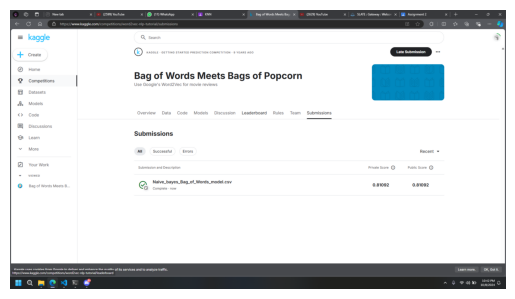

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('C:/Users/muham/OneDrive/Documents/ML Assignments/Fall24_assignment-2/kaggle.png')

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()